In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_X = df.iloc[:,:-1] # input

df_y = df.iloc[:,-1:] # output

df_X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
# Standardizaion of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_Scaled_X =scaler.fit_transform(df_X)

In [8]:
df_X =  pd.DataFrame(df_Scaled_X,columns=df_X.columns)

In [9]:
df_X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


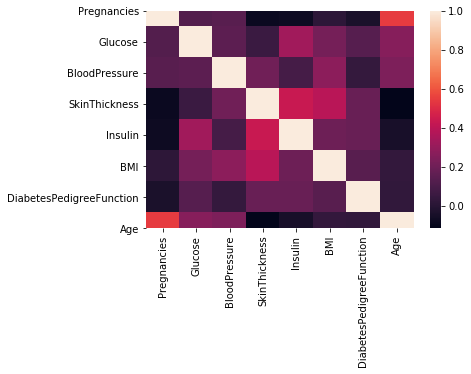

In [10]:
sns.heatmap(df_X.corr())

In [11]:
total_outcome_true = df[df['Outcome'] ==1].shape[0]
total_outcome_false = df[df['Outcome'] ==0].shape[0]

In [12]:
(total_outcome_true,total_outcome_false)

(268, 500)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.30,random_state=10)

In [14]:
print("Number of row missing Glucose: {0}".format(len(df[df['Glucose'] ==0])))
print("Number of row missing BloodPressure :{0}".format(len(df[df['BloodPressure'] ==0])))
print("Number of row missing SkinThickness :{0}".format(len(df[df['SkinThickness'] ==0])))
print("Number of row missing Insulin :{0}".format(len(df[df['Insulin'] ==0])))
print("Number of row missing BMI :{0}".format(len(df[df['BMI'] ==0])))
print("Number of row missing DiabetesPedigreeFunction :{0}".format(len(df[df['DiabetesPedigreeFunction'] ==0])))
print("Number of row missing Age :{0}".format(len(df[df['Age'] ==0])))

Number of row missing Glucose: 5
Number of row missing BloodPressure :35
Number of row missing SkinThickness :227
Number of row missing Insulin :374
Number of row missing BMI :11
Number of row missing DiabetesPedigreeFunction :0
Number of row missing Age :0


In [20]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values =0,strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [22]:
# using Xg Boost

params = {
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'max_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifer = xgboost.XGBClassifier()

In [24]:
random_search = RandomizedSearchCV(estimator=classifer,param_distributions=params,n_iter=5,scoring='roc_auc', \
                                   n_jobs=1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.784, total=   0.3s
[CV] max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.837, total=   0.1s
[CV] max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.748, total=   0.1s
[CV] max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.802, total=   0.1s
[CV] max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  max_depth=12, max_child_weight=3, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.828, total=   0.1s
[CV] max_depth=6, max_child_weight=7, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4 
[CV]  max_depth=6, max_child_weight=7, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4, score=0.794, total=   0.1s
[CV] max_depth=6, max_child_weight=7, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4 
[CV]  max_depth=6, max_child_weight=7, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4, score=0.854, total=   0.1s
[CV] max_depth=6, max_child_weight=7

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_child_weight=3, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [26]:
classifer = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_child_weight=1, max_delta_step=0,
              max_depth=3, min_child_weight=1,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [27]:
classifer.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_child_weight=1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifer,X_train,y_train,cv=10)

In [29]:
scores

array([0.75925926, 0.81481481, 0.81481481, 0.75925926, 0.75925926,
       0.7037037 , 0.7962963 , 0.69811321, 0.79245283, 0.81132075])

In [30]:
scores.mean()

0.7709294199860238

In [31]:
y_pred = classifer.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_pred,y_test)

cm

array([[130,  44],
       [ 14,  43]], dtype=int64)

In [33]:
accuracy_score(y_pred,y_test)

0.7489177489177489